# Pre-processing

## 1. Data Exploration

In [222]:
import sklearn as sk

In [223]:
import numpy as np

In [224]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [225]:
file1 = 'data.csv'

In [226]:
sales1 = pd.read_csv(file1)

In [227]:
sales1.shape

(9600, 3)

In [228]:
sales1.head()

,item_id,week,profit
0,125,21,0.000000
1,4,34,3948.499527
2,54,38,1023.856978
3,82,15,1959.610468
4,66,13,5491.972106


In [229]:
#Checking for missing values:
sales1.apply(lambda x: sum(x.isnull()))

item_id    0
week       0
profit     0
dtype: int64

In [230]:
sales1['profit'].value_counts()

0.000000        1833
3029.213920        1
8997.003635        1
432.412226         1
4401.481729        1
3751.051144        1
12609.269400       1
254.803970         1
7492.022297        1
3776.025065        1
15202.010147       1
6971.116786        1
9608.087317        1
1132.010217        1
4262.070609        1
185.886603         1
6422.861568        1
7871.861412        1
5728.368975        1
13057.209034       1
8495.856496        1
2068.542018        1
1308.994345        1
499.734047         1
9554.577249        1
7514.469110        1
17322.706159       1
567.798854         1
4935.448918        1
5481.701034        1
                ... 
5331.873675        1
10729.075824       1
15267.705357       1
2974.730274        1
16856.236528       1
7887.879025        1
6715.686432        1
7523.852912        1
7632.882502        1
3997.789024        1
5157.890837        1
11.122196          1
2015.300409        1
4881.532457        1
17806.668803       1
1043.477042        1
4036.938878  

In [231]:
sales1.describe()

,item_id,week,profit
count,9600.000000,9600.000000,9600.000000
mean,100.520938,26.525938,5580.163878
std,57.801488,15.019602,5586.007129
min,1.000000,1.000000,0.000000
25%,50.000000,14.000000,806.516798
50%,101.000000,27.000000,4046.271519
75%,151.000000,40.000000,8682.553457
max,200.000000,52.000000,31440.363492


##### There are 200 items & 52 weeks 

In [232]:
file2 = 'category_licensing_fees.csv'
sales2 = pd.read_csv(file2)
sales2.shape

(3, 2)

In [233]:
sales2

,category,licensing_fees
0,A,2000
1,B,5000
2,C,6000


In [234]:
file3 = 'item_id_category_mapping.csv'
sales3 = pd.read_csv(file3)
sales3.shape

(200, 2)

In [235]:
sales3.head()

,item_id,category
0,1,A
1,2,A
2,3,A
3,4,A
4,5,A


In [236]:
sales3.tail()

,item_id,category
195,196,C
196,197,C
197,198,C
198,199,C
199,200,C


In [242]:
df1 = pd.merge(sales1, sales3)
df1.head()

,item_id,week,profit,category
0,125,21,0.0,C
1,125,47,0.0,C
2,125,24,0.0,C
3,125,30,0.0,C
4,125,12,0.0,C


In [243]:
df2 = pd.merge(df1, sales2)
df2.head()

,item_id,week,profit,category,licensing_fees
0,125,21,0.0,C,6000
1,125,47,0.0,C,6000
2,125,24,0.0,C,6000
3,125,30,0.0,C,6000
4,125,12,0.0,C,6000


In [244]:
df2['sales_cost'] = pd.Series(df2.profit + df2.licensing_fees, index=df2.index)
df2.tail()

,item_id,week,profit,category,licensing_fees,sales_cost
9595,84,2,3314.714963,B,5000,8314.714963
9596,84,3,0.000000,B,5000,5000.000000
9597,84,44,9477.210678,B,5000,14477.210678
9598,84,5,0.000000,B,5000,5000.000000
9599,84,42,9650.270331,B,5000,14650.270331


In [245]:
df2[df2['profit'] == 0]

,item_id,week,profit,category,licensing_fees,sales_cost
0,125,21,0.0,C,6000,6000.0
1,125,47,0.0,C,6000,6000.0
2,125,24,0.0,C,6000,6000.0
3,125,30,0.0,C,6000,6000.0
4,125,12,0.0,C,6000,6000.0
6,125,15,0.0,C,6000,6000.0
7,125,9,0.0,C,6000,6000.0
8,125,20,0.0,C,6000,6000.0
9,125,14,0.0,C,6000,6000.0
11,125,17,0.0,C,6000,6000.0


In [246]:
for i in range(len(df2)-1):
    if df2['profit'].loc[i] == 0 :
        df2['sales_cost'].loc[i] = df2['licensing_fees'].loc[i] /2

for index, row in df2.iterrows():
    if row['profit'] ==0:
        row['sales_cost'] = row['licensing_fees']/2

In [247]:
df2[df2['profit'] == 0]

,item_id,week,profit,category,licensing_fees,sales_cost
0,125,21,0.0,C,6000,3000.0
1,125,47,0.0,C,6000,3000.0
2,125,24,0.0,C,6000,3000.0
3,125,30,0.0,C,6000,3000.0
4,125,12,0.0,C,6000,3000.0
6,125,15,0.0,C,6000,3000.0
7,125,9,0.0,C,6000,3000.0
8,125,20,0.0,C,6000,3000.0
9,125,14,0.0,C,6000,3000.0
11,125,17,0.0,C,6000,3000.0


In [248]:
len(df2)

9600

In [249]:
df2.describe()

,item_id,week,profit,licensing_fees,sales_cost
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,100.520938,26.525938,5580.163878,4693.958333,9748.236795
std,57.801488,15.019602,5586.007129,1538.438615,5960.005790
min,1.000000,1.000000,0.000000,2000.000000,1000.000000
25%,50.000000,14.000000,806.516798,5000.000000,5147.740878
50%,101.000000,27.000000,4046.271519,5000.000000,8739.314533
75%,151.000000,40.000000,8682.553457,6000.000000,13392.373287
max,200.000000,52.000000,31440.363492,6000.000000,34258.428460


In [250]:
df2['sales_cost'].value_counts()

3000.000000     1019
2500.000000      785
1000.000000       29
7910.213801        1
14340.730276       1
25155.451446       1
10552.225350       1
14299.503902       1
7336.795295        1
9845.079467        1
25264.170357       1
20276.184319       1
5176.301881        1
12664.750482       1
4014.335198        1
26692.657499       1
6580.763279        1
12106.462676       1
7992.526303        1
14477.210678       1
9104.163565        1
6147.960242        1
24828.757407       1
10639.117310       1
9026.506028        1
12475.045211       1
7521.299305        1
6099.991823        1
15352.049069       1
12378.642202       1
                ... 
25876.841911       1
15101.703270       1
7035.551528        1
22775.824927       1
8474.621153        1
6753.396438        1
16319.823408       1
24679.928842       1
10459.403215       1
12646.403736       1
7636.068083        1
5746.391672        1
5112.600339        1
10726.583665       1
21818.815362       1
13490.098594       1
16993.868872 

df2[df2['sales_cost'] == 0]

In [251]:
df2.head()

,item_id,week,profit,category,licensing_fees,sales_cost
0,125,21,0.0,C,6000,3000.0
1,125,47,0.0,C,6000,3000.0
2,125,24,0.0,C,6000,3000.0
3,125,30,0.0,C,6000,3000.0
4,125,12,0.0,C,6000,3000.0


In [252]:
df2.describe()

,item_id,week,profit,licensing_fees,sales_cost
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,100.520938,26.525938,5580.163878,4693.958333,9748.236795
std,57.801488,15.019602,5586.007129,1538.438615,5960.005790
min,1.000000,1.000000,0.000000,2000.000000,1000.000000
25%,50.000000,14.000000,806.516798,5000.000000,5147.740878
50%,101.000000,27.000000,4046.271519,5000.000000,8739.314533
75%,151.000000,40.000000,8682.553457,6000.000000,13392.373287
max,200.000000,52.000000,31440.363492,6000.000000,34258.428460


# Visualizing the data

### 1.with item-id as attribute

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
X_i = df2['item_id']
y_i = df2['sales_cost']

In [255]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i,y_i, test_size=0.2, random_state=0)
X_train_i.head(), y_train_i.head()

(5783      5
 2948    147
 4442     37
 5281     46
 4937     41
 Name: item_id, dtype: int64, 5783     7114.582617
 2948    26115.029925
 4442     6258.772231
 5281     5159.436035
 4937    11304.888616
 Name: sales_cost, dtype: float64)

In [256]:
X_train_i = X_train_i.values.reshape(-1,1)
X_test_i = X_test_i.values.reshape(-1,1)

In [257]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales_cost')

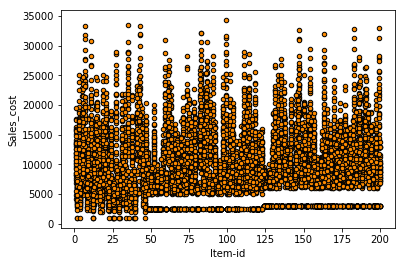

In [258]:
plt.figure()
plt.scatter(X_train_i,y_train_i,s=20,edgecolor = 'black', c = "darkorange", label = "y_train_i")
plt.xlabel('Item-id') 
plt.ylabel('Sales_cost')

Text(0, 0.5, 'Sales_cost')

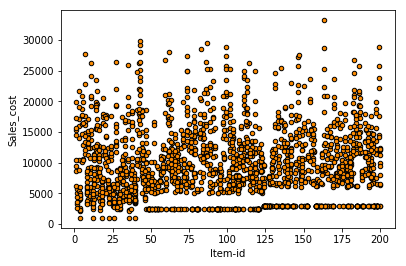

In [259]:
plt.figure()
plt.scatter(X_test_i,y_test_i,s=20,edgecolor = 'black', c = "darkorange", label = "y_test_i")
plt.xlabel('Item-id') 
plt.ylabel('Sales_cost')

### 2. With week as an attribute

In [260]:
Xw = df2['week']
yw = df2['sales_cost']

In [261]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(Xw,yw, test_size=0.2, random_state=0)
X_train_w.head(), y_train_w.head()

(5783    14
 2948    16
 4442    39
 5281    34
 4937    11
 Name: week, dtype: int64, 5783     7114.582617
 2948    26115.029925
 4442     6258.772231
 5281     5159.436035
 4937    11304.888616
 Name: sales_cost, dtype: float64)

In [262]:
X_train_w = X_train_w.values.reshape(-1,1)
X_test_w = X_test_w.values.reshape(-1,1)

Text(0, 0.5, 'Sales_cost')

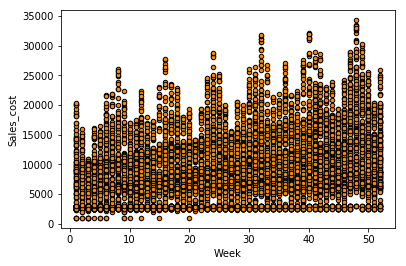

In [263]:
plt.figure()
plt.scatter(X_train_w,y_train_w,s=20,edgecolor = 'black', c = "darkorange", label = "y_train_w")
plt.xlabel('Week') 
plt.ylabel('Sales_cost')

Text(0, 0.5, 'Sales_cost')

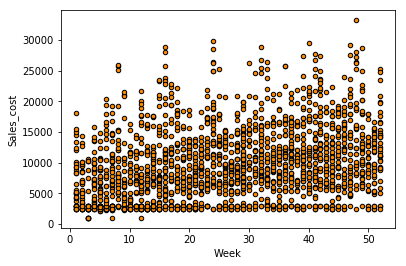

In [264]:
plt.figure()
plt.scatter(X_test_w,y_test_w,s=20,edgecolor = 'black', c = "darkorange", label = "y_test_w")
plt.xlabel('Week') 
plt.ylabel('Sales_cost')

# Feature Engineering
### 3. categories as attributes 

Since there is a relation between categories & license_fees, categories & item_id --which inturn will effect the sales.
We need to visualize the categorical data too

In [265]:
df2.head()

,item_id,week,profit,category,licensing_fees,sales_cost
0,125,21,0.0,C,6000,3000.0
1,125,47,0.0,C,6000,3000.0
2,125,24,0.0,C,6000,3000.0
3,125,30,0.0,C,6000,3000.0
4,125,12,0.0,C,6000,3000.0


In [266]:
df2.category.value_counts()

C    3701
B    3686
A    2213
Name: category, dtype: int64

In [267]:
#dummy encoding
embarked_dataset = pd.get_dummies(df2.category, prefix='Category')
embarked_dataset.head()

,Category_A,Category_B,Category_C
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [268]:
df2 = pd.concat([df2, embarked_dataset], axis=1, levels=1)
df2.head()

,item_id,week,profit,category,licensing_fees,sales_cost,Category_A,Category_B,Category_C
0,125,21,0.0,C,6000,3000.0,0,0,1
1,125,47,0.0,C,6000,3000.0,0,0,1
2,125,24,0.0,C,6000,3000.0,0,0,1
3,125,30,0.0,C,6000,3000.0,0,0,1
4,125,12,0.0,C,6000,3000.0,0,0,1


In [269]:
df2.tail()

,item_id,week,profit,category,licensing_fees,sales_cost,Category_A,Category_B,Category_C
9595,84,2,3314.714963,B,5000,8314.714963,0,1,0
9596,84,3,0.000000,B,5000,2500.000000,0,1,0
9597,84,44,9477.210678,B,5000,14477.210678,0,1,0
9598,84,5,0.000000,B,5000,2500.000000,0,1,0
9599,84,42,9650.270331,B,5000,14650.270331,0,1,0


In [270]:
df2.describe()

,item_id,week,profit,licensing_fees,sales_cost,Category_A,Category_B,Category_C
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,100.520938,26.525938,5580.163878,4693.958333,9748.236795,0.230521,0.383958,0.385521
std,57.801488,15.019602,5586.007129,1538.438615,5960.005790,0.421188,0.486373,0.486743
min,1.000000,1.000000,0.000000,2000.000000,1000.000000,0.000000,0.000000,0.000000
25%,50.000000,14.000000,806.516798,5000.000000,5147.740878,0.000000,0.000000,0.000000
50%,101.000000,27.000000,4046.271519,5000.000000,8739.314533,0.000000,0.000000,0.000000
75%,151.000000,40.000000,8682.553457,6000.000000,13392.373287,0.000000,1.000000,1.000000
max,200.000000,52.000000,31440.363492,6000.000000,34258.428460,1.000000,1.000000,1.000000


#### with categories

In [271]:
Xca = df2['Category_A']
yca = df2['sales_cost']

In [272]:
Xca = Xca.values.reshape(-1,1)

Text(0, 0.5, 'Sales_cost')

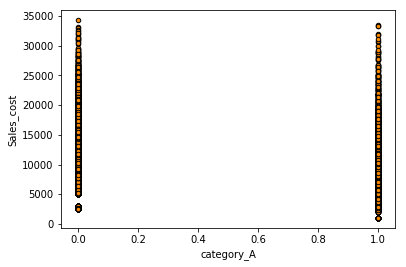

In [273]:
plt.figure()
plt.scatter(Xca, yca, s=20, edgecolor = 'black', c = "darkorange", label = "yca")
plt.xlabel('category_A') 
plt.ylabel('Sales_cost')

Text(0, 0.5, 'Sales_cost')

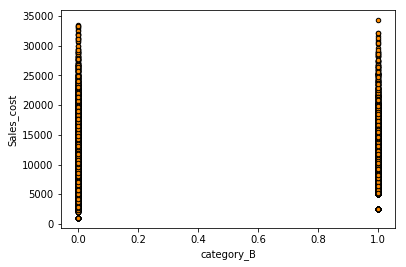

In [274]:
Xcb = df2['Category_B']
ycb = df2['sales_cost']
Xcb = Xcb.values.reshape(-1,1)
plt.figure()
plt.scatter(Xcb, ycb, s=20, edgecolor = 'black', c = "darkorange", label = "ycb")
plt.xlabel('category_B') 
plt.ylabel('Sales_cost')

Text(0, 0.5, 'Sales_cost')

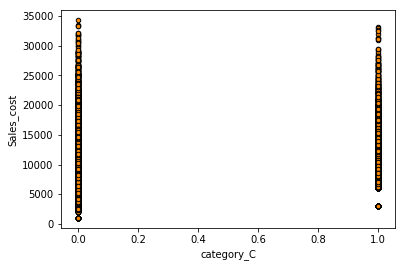

In [275]:
Xcc = df2['Category_C']
ycc = df2['sales_cost']
Xcc = Xcc.values.reshape(-1,1)
plt.figure()
plt.scatter(Xcc, ycc, s=20, edgecolor = 'black', c = "darkorange", label = "ycc")
plt.xlabel('category_C') 
plt.ylabel('Sales_cost')

Generating training and test datasets

In [276]:
X = df2[['item_id', 'week', 'Category_A', 'Category_B', 'Category_C']]
X.head()

,item_id,week,Category_A,Category_B,Category_C
0,125,21,0,0,1
1,125,47,0,0,1
2,125,24,0,0,1
3,125,30,0,0,1
4,125,12,0,0,1


In [277]:
X.shape

(9600, 5)

In [278]:
y = df2[['sales_cost']]
y.head()

,sales_cost
0,3000.0
1,3000.0
2,3000.0
3,3000.0
4,3000.0


In [279]:
y.shape

(9600, 1)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.head()

,item_id,week,Category_A,Category_B,Category_C
5783,5,14,1,0,0
2948,147,16,0,0,1
4442,37,39,1,0,0
5281,46,34,1,0,0
4937,41,11,1,0,0


In [281]:
y_train.head()

,sales_cost
5783,7114.582617
2948,26115.029925
4442,6258.772231
5281,5159.436035
4937,11304.888616


In [282]:
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

# Model building

# 1. Linear Regression 

In [283]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [284]:
regr1 = linear_model.LinearRegression()
regr_linear_model = regr1.fit(X_train,y_train)

In [285]:
y_predicted = regr_linear_model.predict(X_test)

In [286]:
from sklearn.metrics import mean_absolute_error

In [287]:
error1 = mean_absolute_error(y_test, y_predicted)
error1

4387.961942329493

In [288]:
X_test.shape, y_test.shape

((1920, 5), (1920, 1))

In [289]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
regr1 = LinearRegression(normalize=True)
coef1 = pd.Series(regr1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

NameError: name 'train' is not defined

ValueError: x and y must be the same size

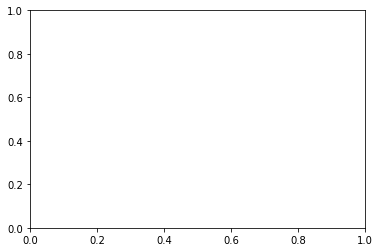

In [290]:
ax1 = plt.figure().add_subplot(111)
ax1.scatter(X_test, y_test, c='b', marker=".", label='true')
ax1.scatter(X_test,y_predicted, c='r', marker=".", label='predicted')
plt.legend(loc='upper left')
plt.xlabel('Item_id') 
plt.ylabel('Sales_cost')

# 2. Random forest

In [291]:
from sklearn.ensemble import RandomForestRegressor

In [292]:
regr2 = RandomForestRegressor(n_estimators = 100, max_depth= 3, random_state=0)

In [293]:
regr2.fit(X_train, y_train)

C:\Users\Ganji Gunavardhan\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [294]:
y_predicted2 = regr2.predict(X_test)
y_predicted2

array([11773.72610132, 10841.30548992,  9675.15004143, ...,
        5886.20697475, 13336.6391709 , 13199.01748148])

In [295]:
error2 = mean_absolute_error(y_test, y_predicted2)
error2

4354.882073002548

ax1 = plt.figure().add_subplot(111)
ax1.scatter(X_test, y_test, c='b', marker=".", label='true')
ax1.scatter(X_test,y_predicted2, c='r', marker=".", label='predicted2')
plt.legend(loc='upper left')
plt.xlabel('Item_id') 
plt.ylabel('Sales_cost')

# 3. XG Boost

In [296]:
import xgboost as xgb

In [297]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=0)

In [298]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [299]:
y_predicted3 = xgb_model.predict(X_test)
y_predicted3

array([10452.32  , 11380.357 ,  9379.07  , ...,  6382.7188, 11291.4795,
       13306.704 ], dtype=float32)

In [300]:
error3 = mean_absolute_error(y_test, y_predicted3)
error3

3531.183537206663

ax1 = plt.figure().add_subplot(111)
ax1.scatter(X_test, y_test, c='b', marker=".", label='true')
ax1.scatter(X_test,y_predicted3, c='r', marker=".", label='predicted3')
plt.legend(loc='upper left')
plt.xlabel('Item_id') 
plt.ylabel('Sales_cost')

# 4. Decision Trees

In [301]:
from sklearn.tree import DecisionTreeRegressor

In [302]:
regr_4_1 = DecisionTreeRegressor(max_depth = 2)
regr_4_2 = DecisionTreeRegressor(max_depth = 5)
regr_4_1.fit(X_train,y_train)
regr_4_2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [303]:
predicted_4_1 = regr_4_1.predict(X_test)
predicted_4_2 = regr_4_2.predict(X_test)

In [304]:
error_4_1 = mean_absolute_error(y_test , predicted_4_1)
error_4_1

4395.222864256096

In [305]:
error_4_2 = mean_absolute_error(y_test , predicted_4_2)
error_4_2

4345.643514071935

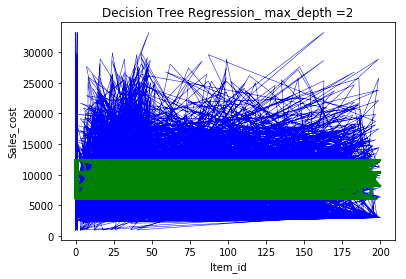

In [306]:
plt.figure()
plt.plot(X_test, y_test, color="blue", label="max_depth=2", linewidth=0.5)
plt.plot(X_test, predicted_4_1, color="green", label="max_depth=5", linewidth=2)
plt.xlabel("Item_id")
plt.ylabel("Sales_cost")
plt.title("Decision Tree Regression_ max_depth =2")
plt.show()

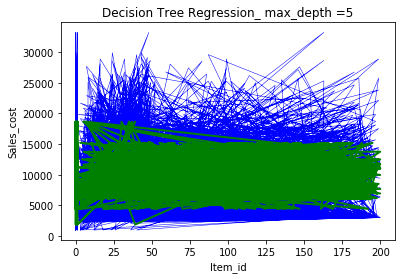

In [307]:
plt.figure()
plt.plot(X_test, y_test, color="blue", label="max_depth=2", linewidth=0.5)
plt.plot(X_test, predicted_4_2, color="green", label="max_depth=5", linewidth=2)
plt.xlabel("Item_id")
plt.ylabel("Sales_cost")
plt.title("Decision Tree Regression_ max_depth =5")
plt.show()

# 5.AdaBoost

In [308]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [309]:
regr_5_1 = DecisionTreeRegressor(max_depth=4)
regr_5_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=100, random_state= 0)

In [310]:
regr_5_1.fit(X_train, y_train)
regr_5_2.fit(X_train, y_train)

C:\Users\Ganji Gunavardhan\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=0)

In [311]:
# Predict
predicted_5_1 = regr_5_1.predict(X_test)
predicted_5_2 = regr_5_2.predict(X_test)

In [312]:
error_5_1 = mean_absolute_error(y_test , predicted_5_1)
error_5_1

4348.775408855082

In [313]:
error_5_2 = mean_absolute_error(y_test , predicted_5_2)
error_5_2
#this shows that it got overfitted

4808.073434096627

# Plot the results
plt.figure()
plt.scatter(X, y, c="b", label="training samples", linewidth=0.5)
plt.plot(X_test, predicted_5_1, c="g", label="n_estimators=1", linewidth=2)
plt.xlabel("Item_id")
plt.ylabel("Sales_cost")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

plt.figure()
plt.scatter(X, y, c="b", label="training samples", linewidth=0.5)
plt.plot(X_test, predicted_5_2, c="r", label="n_estimators=100", linewidth=2)
plt.xlabel("Item_id")
plt.ylabel("Sales_cost")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# Comparision of the Models

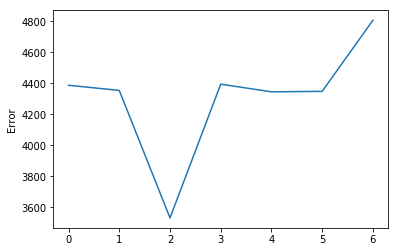

In [314]:
plt.plot([error1, error2, error3, error_4_1, error_4_2, error_5_1, error_5_2])
plt.ylabel('Error')
plt.show()

We can observe that error3 is minimum, which corresponds to XG Boost model. 
So we consider XG Boost for predicting the test data

# Test data set

In [315]:
file4 = 'test.csv'
sales4 = pd.read_csv(file4)
sales4.shape

(800, 2)

In [316]:
sales4.head()

,item_id,week
0,21,1
1,32,1
2,38,1
3,41,1
4,56,1


In [317]:
sales4 = pd.merge(sales4, sales3)
sales4.head()

,item_id,week,category
0,21,1,A
1,21,5,A
2,21,27,A
3,21,42,A
4,32,1,A


In [318]:
sales4 = pd.merge(sales4, sales2)
sales4.head()

,item_id,week,category,licensing_fees
0,21,1,A,2000
1,21,5,A,2000
2,21,27,A,2000
3,21,42,A,2000
4,32,1,A,2000


In [319]:
embarked_dataset2 = pd.get_dummies(sales4.category, prefix='Category')
embarked_dataset2.head()

,Category_A,Category_B,Category_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [320]:
sales4 = pd.concat([sales4, embarked_dataset2], axis=1, levels=1)
sales4.head()

,item_id,week,category,licensing_fees,Category_A,Category_B,Category_C
0,21,1,A,2000,1,0,0
1,21,5,A,2000,1,0,0
2,21,27,A,2000,1,0,0
3,21,42,A,2000,1,0,0
4,32,1,A,2000,1,0,0


In [321]:
sales4.describe()

,item_id,week,licensing_fees,Category_A,Category_B,Category_C
count,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000
mean,100.248750,26.188750,4707.50000,0.223750,0.397500,0.378750
std,56.993638,14.887669,1519.81283,0.417017,0.489687,0.485379
min,1.000000,1.000000,2000.00000,0.000000,0.000000,0.000000
25%,52.000000,13.000000,5000.00000,0.000000,0.000000,0.000000
50%,98.500000,26.000000,5000.00000,0.000000,0.000000,0.000000
75%,150.000000,39.000000,6000.00000,0.000000,1.000000,1.000000
max,200.000000,52.000000,6000.00000,1.000000,1.000000,1.000000


In [322]:
test_data = sales4[['item_id', 'week', 'Category_A', 'Category_B', 'Category_C']]

In [323]:
Final_predicted = xgb_model.predict(test_data)

In [324]:
Final_predicted.shape

(800,)

In [325]:
df3 = pd.DataFrame(data=Final_predicted, columns=['Expected_sales'])

In [326]:
df3.head()

,Expected_sales
0,10197.956055
1,9260.138672
2,11811.225586
3,14193.314453
4,7925.004395


In [327]:
df3.describe()

,Expected_sales
count,800.000000
mean,9756.127930
std,2621.479248
min,3335.746582
25%,7909.228638
50%,9534.203125
75%,11417.686523
max,19397.197266


In [328]:
sales4 = pd.concat([sales4, df3], axis=1, levels=1)
sales4.head()

,item_id,week,category,licensing_fees,Category_A,Category_B,Category_C,Expected_sales
0,21,1,A,2000,1,0,0,10197.956055
1,21,5,A,2000,1,0,0,9260.138672
2,21,27,A,2000,1,0,0,11811.225586
3,21,42,A,2000,1,0,0,14193.314453
4,32,1,A,2000,1,0,0,7925.004395


In [329]:
sales4['profit'] = pd.Series(sales4.Expected_sales - sales4.licensing_fees, index=sales4.index)
sales4.head()

,item_id,week,category,licensing_fees,Category_A,Category_B,Category_C,Expected_sales,profit
0,21,1,A,2000,1,0,0,10197.956055,8197.956055
1,21,5,A,2000,1,0,0,9260.138672,7260.138672
2,21,27,A,2000,1,0,0,11811.225586,9811.225586
3,21,42,A,2000,1,0,0,14193.314453,12193.314453
4,32,1,A,2000,1,0,0,7925.004395,5925.004395


In [330]:
sales4.tail() 

,item_id,week,category,licensing_fees,Category_A,Category_B,Category_C,Expected_sales,profit
795,139,48,C,6000,0,0,1,14918.710938,8918.710938
796,139,50,C,6000,0,0,1,12169.966797,6169.966797
797,137,42,C,6000,0,0,1,11739.849609,5739.849609
798,185,46,C,6000,0,0,1,11107.547852,5107.547852
799,185,49,C,6000,0,0,1,12919.063477,6919.063477


In [331]:
sales4.describe()

,item_id,week,licensing_fees,Category_A,Category_B,Category_C,Expected_sales,profit
count,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,100.248750,26.188750,4707.50000,0.223750,0.397500,0.378750,9756.127930,5048.627397
std,56.993638,14.887669,1519.81283,0.417017,0.489687,0.485379,2621.479248,3086.816665
min,1.000000,1.000000,2000.00000,0.000000,0.000000,0.000000,3335.746582,-2664.253418
25%,52.000000,13.000000,5000.00000,0.000000,0.000000,0.000000,7909.228638,2842.583740
50%,98.500000,26.000000,5000.00000,0.000000,0.000000,0.000000,9534.203125,4857.689453
75%,150.000000,39.000000,6000.00000,0.000000,1.000000,1.000000,11417.686523,6977.080811
max,200.000000,52.000000,6000.00000,1.000000,1.000000,1.000000,19397.197266,16677.343750


There is no negative term in the profit column which means --> there is no loss for even on single item in the test data

In [332]:
len(sales4['profit'])

800

In [334]:
sales4[['item_id', 'week', 'profit']].to_csv('Predicted_data1.csv', index= False)